In [46]:
from glob  import glob
import pandas as pd
import os
from shutil import copy

In [59]:
df = pd.read_excel("../ME22_Concentration_Particles_Raw data.xlsx")

In [110]:
columns = ["Sample", "Particle Id", "Group", "Score"]
df[columns]

,Sample,Particle Id,Group,Score
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780
...,...,...,...,...
7415,ME22_TLY_P2,1446,Tire wear,0.973
7416,ME22_TLY_P2,1500,Tire wear,0.989
7417,ME22_TLY_P2,1614,Tire wear,0.384
7418,ME22_TLY_P2,1662,Tire wear,0.964


In [111]:
remain_df = df[df.Score < 0.55]

In [112]:
remain_df

,Sample,Particle Id,Group,Score,PM80-1 (µg/m3),Particle # conc. (#particle/m3),CmNormPM10-PM2.5 (µg/m3),Mass deposition (µg/cm2/s),Number deposition (#particles/cm2/s),MassMicrogram (µg),...,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es
6,BO22_Car_p1_sec. analysis,174,Biogenic_Organic,0.425,0.156201,29.122220,0.000174,2.271519e-13,0.000042,0.005364,...,0,0,0,0,0,0,0,0,0,0
7,BO22_Car_p1_sec. analysis,176,Biogenic_Organic,0.402,0.056854,219.816547,0.043846,1.095374e-14,0.000042,0.000259,...,0,0,0,0,0,0,0,0,0,0
9,BO22_Car_p1_sec. analysis,285,Biogenic_Organic,0.430,0.046958,322.233578,0.041421,6.171587e-15,0.000042,0.000146,...,0,0,0,0,0,0,0,0,0,0
10,BO22_Car_p1_sec. analysis,291,Biogenic_Organic,0.460,0.018168,2152.769036,0.009123,3.574019e-16,0.000042,0.000008,...,0,0,0,0,0,0,0,0,0,0
19,BO22_Car_p1_sec. analysis,429,Biogenic_Organic,0.536,0.037673,500.648757,0.035369,3.186789e-15,0.000042,0.000075,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,ME22_TLY_P2,601,Tire wear,0.518,0.014685,800.482563,0.013292,3.276261e-16,0.000032,0.000018,...,0,0,0,0,0,0,0,0,0,0
7408,ME22_TLY_P2,747,Tire wear,0.477,0.013741,914.302705,0.011863,2.683931e-16,0.000032,0.000015,...,0,0,0,0,0,0,0,0,0,0
7409,ME22_TLY_P2,956,Tire wear,0.434,0.017852,541.702613,0.016967,5.885250e-16,0.000032,0.000033,...,0,0,0,0,0,0,0,0,0,0
7410,ME22_TLY_P2,985,Tire wear,0.512,0.038050,119.231465,0.022563,5.699280e-15,0.000032,0.000319,...,0,0,0,0,0,0,0,0,0,0


In [113]:
cl_df = df[df.Score > 0.55]
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6256 entries, 0 to 7419
Columns: 144 entries, Sample to Es
dtypes: float64(78), int64(64), object(2)
memory usage: 6.9+ MB


In [114]:
chemic_features = ["Si", "C", "O", "P", "Cl", "Na", "Ca", "Al", "Fe"]
#morph_features = ["GrayMean", "Solidity", "Irregularity", "ShapeFactor", "LengthMicron", "Eccentricity", "GrayKurt", "FractalDimR", "AreaMicron2", "GrayStd", "Grain3"]
features = columns  + chemic_features 

In [115]:
# process morphological features
cl_df = cl_df[features].copy()
# cl_df["AreaMicron2"] = cl_df["AreaMicron2"].transform('log')
# cl_df["Irregularity"] = cl_df["Irregularity"].transform('log')
# cl_df["LengthMicron"] = cl_df["LengthMicron"].transform('log')
# cl_df = cl_df.rename(columns={"AreaMicron2": "LogAreaMicron2", 
#                       "Irregularity": "LogIrregularity", 
#                       "LengthMicron": "LogLengthMicron"})
cl_df

,Sample,Particle Id,Group,Score,Si,C,O,P,Cl,Na,Ca,Al,Fe
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,0.000,58.245,38.407,1.272,0.293,0.000,0.000,0.000,0.000
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,0.000,58.868,36.102,1.123,0.505,0.354,0.000,0.000,0.000
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,0.000,66.937,31.014,0.658,0.000,0.309,0.000,0.000,0.000
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,0.000,56.770,32.504,0.956,0.000,0.000,0.000,0.000,0.000
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,0.270,85.876,13.854,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,ME22_TLY_P2,1351,Tire wear,0.676,11.520,58.643,22.617,0.000,0.000,0.000,0.000,1.053,4.106
7415,ME22_TLY_P2,1446,Tire wear,0.973,10.747,34.808,33.543,0.000,0.000,0.486,1.759,5.756,10.721
7416,ME22_TLY_P2,1500,Tire wear,0.989,5.470,44.663,32.910,0.221,0.000,0.298,2.212,2.763,8.667
7418,ME22_TLY_P2,1662,Tire wear,0.964,4.181,32.476,35.681,0.000,0.000,0.508,12.860,1.610,10.304


### Train test split

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cl_df, cl_df.Group, test_size=0.30, random_state=42)
print(len(X_train), len(X_test))

4379 1877


train_df = pd.DataFrame(X_train)
train_df.head(5)

## csv dataset for text dataLoaders

In [333]:
root_dir = "../ME22 - Kopie"

In [334]:
in_dir = 'ParticleClassifier/Data/Particles'

In [335]:
columns = ["Sample", "Particle Id", "Group", "Score"]

In [336]:
del current_df

In [337]:

current_df = X_test.copy()
partition = 'val'
dest_dir = f"/media/lecun/HD/Expor2/ParticlesDB/VitabDataset/{partition}/"

In [338]:
dest_dir = f"/media/lecun/HD/Expor2/ParticlesDB/VitabDataset/{partition}/"

In [339]:
#### RUN WITH CAUTION
names = []
for _, particle in current_df[columns].iterrows():
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    new_name = "_".join([particle['Group'],
                    particle['Sample'], str(particle['Particle Id'])])+'.png'
    
    new_dir = os.path.join(dest_dir + 'Images', new_name)
    names.append(new_name)
    #copy(im_path, new_dir)

In [340]:
current_df.insert(loc=0, column='Name', value=names)
current_df = current_df.drop( ["Sample", "Particle Id", "Score"], 'columns')

In [341]:
current_df

,Name,Group,Si,C,O,P,Cl,Na,Ca,Al,Fe
2721,Mineral_ME22_MA_P1_425.png,Mineral,15.133,22.587,44.917,0.000,0.000,0.000,15.882,0.427,0.000
5763,Mineral_ME22_TG_P2_1126.png,Mineral,16.422,15.631,41.772,0.000,0.000,0.454,0.000,10.760,13.442
4716,Mineral_ME22_MA_P3_2065.png,Mineral,0.000,27.407,33.427,0.000,0.000,0.000,27.354,0.000,11.813
1905,Biogenic_Organic_ME22_MA_P1_1520.png,Biogenic_Organic,0.000,59.965,32.968,0.700,0.478,2.009,1.972,0.000,0.000
6514,Biogenic_Organic_ME22_TLY_P2_356.png,Biogenic_Organic,0.000,59.704,36.698,1.486,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
6616,Biogenic_Organic_ME22_TLY_P2_940.png,Biogenic_Organic,0.000,51.045,29.004,1.913,0.000,0.431,0.636,0.000,0.000
1511,Biogenic_Organic_CA22_UV_p1_sec. analysis_1908...,Biogenic_Organic,0.000,68.741,29.147,1.115,0.000,0.000,0.000,0.000,0.000
88,Biogenic_Organic_BO22_Car_p1_sec. analysis_597...,Biogenic_Organic,1.853,69.804,23.594,0.153,0.000,0.394,0.880,0.829,0.000
4756,Tire wear_ME22_MA_P3_850.png,Tire wear,9.490,39.946,29.698,0.200,0.000,0.380,3.316,5.808,6.627


In [342]:
current_df = current_df.drop(current_df[(current_df["Group"] == "Salt") | (current_df["Group"] == "Ti-rich Paint")].index)

In [343]:
current_df.Group.unique()

array(['Mineral', 'Biogenic_Organic', 'Tire wear', 'Metallic'],
      dtype=object)

In [344]:
current_df.to_csv(os.path.join(dest_dir, "particles_database.csv"), index=False)

In [362]:

#current_df = X_test.copy()
partition = 'val'
dest_dir = f"/media/lecun/HD/Expor2/ParticlesDB/VitabDataset/{partition}/"

In [363]:
import csv
import os 

csv_file = os.path.join(dest_dir, "particles_database.csv")

group = []
with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader, None)  #
        for row in csv_reader:
            group.append(row[1])
            print(row[1:])

['Mineral', '15.133', '22.587', '44.917', '0.0', '0.0', '0.0', '15.882', '0.427', '0.0']
['Mineral', '16.422', '15.631', '41.772', '0.0', '0.0', '0.454', '0.0', '10.76', '13.442']
['Mineral', '0.0', '27.407', '33.427', '0.0', '0.0', '0.0', '27.354', '0.0', '11.813']
['Biogenic_Organic', '0.0', '59.965', '32.968', '0.7', '0.478', '2.009', '1.972', '0.0', '0.0']
['Biogenic_Organic', '0.0', '59.704', '36.698', '1.486', '0.0', '0.0', '0.0', '0.0', '0.0']
['Mineral', '16.649', '26.445', '39.027', '0.0', '0.0', '0.742', '1.699', '9.199', '3.237']
['Biogenic_Organic', '0.0', '89.586', '10.414', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0']
['Mineral', '13.19', '17.915', '40.095', '0.0', '0.0', '0.556', '0.879', '2.981', '8.948']
['Biogenic_Organic', '0.0', '73.821', '25.066', '0.0', '0.0', '1.113', '0.0', '0.0', '0.0']
['Biogenic_Organic', '0.0', '61.511', '33.347', '1.306', '0.0', '0.0', '1.892', '0.0', '0.0']
['Biogenic_Organic', '0.848', '76.939', '22.213', '0.0', '0.0', '0.0', '0.0', '0.0', '

In [364]:
import numpy as np
u, c = np.unique(group, return_counts=True)
print(dict(zip(u,c)))

{'Biogenic_Organic': 616, 'Metallic': 113, 'Mineral': 946, 'Tire wear': 193}


# Create folder class Database

In [19]:
def create_validate_folder(path):
    if not os.path.exists(path):
        os.mkdir(path)
    return

### remove non confident labels

<AxesSubplot:>

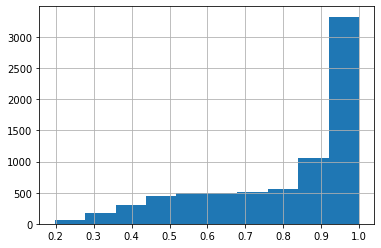

In [21]:
df.Score.hist()

In [40]:
db_df = cl_df[cl_df.Score > 0.55].copy() #Remove non confident labels
remain_df = cl_df[cl_df.Score <= 0.55].copy() #Remove non confident labels

In [41]:
db_df

,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,Eccentricity,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
0,BO22_Car_p1_sec. analysis,16,Biogenic_Organic,0.961,0.214,0.782,1.779181,4.220,2.793065,0.975,...,0.025,0.000,58.245,38.407,1.272,0.293,0.000,0.000,0.000,0.000
1,BO22_Car_p1_sec. analysis,22,Biogenic_Organic,0.972,0.234,0.863,1.495373,2.724,2.570549,0.972,...,0.010,0.000,58.868,36.102,1.123,0.505,0.354,0.000,0.000,0.000
2,BO22_Car_p1_sec. analysis,130,Biogenic_Organic,0.963,0.201,0.956,0.273837,1.141,1.545006,0.541,...,0.000,0.000,66.937,31.014,0.658,0.000,0.309,0.000,0.000,0.000
3,BO22_Car_p1_sec. analysis,132,Biogenic_Organic,0.963,0.238,0.973,0.413433,1.087,1.344951,0.721,...,0.000,0.000,56.770,32.504,0.956,0.000,0.000,0.000,0.000,0.000
4,BO22_Car_p1_sec. analysis,150,Biogenic_Organic,0.780,0.227,0.973,0.093490,1.010,1.099612,0.267,...,0.000,0.270,85.876,13.854,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,ME22_TLY_P2,1351,Tire wear,0.676,0.258,0.810,0.746688,2.775,2.137003,0.792,...,0.031,11.520,58.643,22.617,0.000,0.000,0.000,0.000,1.053,4.106
7415,ME22_TLY_P2,1446,Tire wear,0.973,0.315,0.796,0.954357,2.153,2.265714,0.767,...,0.016,10.747,34.808,33.543,0.000,0.000,0.486,1.759,5.756,10.721
7416,ME22_TLY_P2,1500,Tire wear,0.989,0.300,0.917,0.509825,1.274,1.640549,0.703,...,0.023,5.470,44.663,32.910,0.221,0.000,0.298,2.212,2.763,8.667
7418,ME22_TLY_P2,1662,Tire wear,0.964,0.312,0.829,0.692647,1.789,1.420937,0.395,...,0.032,4.181,32.476,35.681,0.000,0.000,0.508,12.860,1.610,10.304


In [28]:
dest_dir = "../ParticlesDB/folders/"

In [41]:
## RUN WITH CAUTION
create_validate_folder(dest_dir)
create_validate_folder(os.path.join(dest_dir, 'train'))

for _, particle in train_df.iterrows():
    #print(particle)
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    #print(os.path.exists(im_path))
    
    create_validate_folder(os.path.join(dest_dir, 'train', particle['Group']))
    
    new_name = os.path.join(dest_dir, 'train', particle['Group'], "_".join([particle['Group'],
                                particle['Sample'], str(particle['Particle Id'])])+'.png')
   # copy(im_path, new_name)

validation split

In [42]:
test_df = pd.DataFrame(X_test)
test_df.head(5)

,Image,Sample,Particle Id,Group,Score,GrayMean,Solidity,LogIrregularity,ShapeFactor,LogLengthMicron,...,Grain3,Si,C,O,P,Cl,Na,Ca,Al,Fe
2721,Mineral_ME22_MA_P1_425.png,ME22_MA_P1,425,Mineral,0.999,0.342,0.809,0.850151,2.166,1.171243,...,0.000,15.133,22.587,44.917,0.000,0.000,0.000,15.882,0.427,0.000
5763,Mineral_ME22_TG_P2_1126.png,ME22_TG_P2,1126,Mineral,0.879,0.333,0.816,0.536493,1.612,1.395997,...,0.010,16.422,15.631,41.772,0.000,0.000,0.454,0.000,10.760,13.442
4716,Mineral_ME22_MA_P3_2065.png,ME22_MA_P3,2065,Mineral,0.601,0.331,0.901,1.108563,1.647,0.764072,...,0.068,0.000,27.407,33.427,0.000,0.000,0.000,27.354,0.000,11.813
1905,Biogenic_Organic_ME22_MA_P1_1520.png,ME22_MA_P1,1520,Biogenic_Organic,0.698,0.159,0.572,1.378010,5.850,1.924103,...,0.052,0.000,59.965,32.968,0.700,0.478,2.009,1.972,0.000,0.000
6514,Biogenic_Organic_ME22_TLY_P2_356.png,ME22_TLY_P2,356,Biogenic_Organic,0.936,0.193,0.794,1.742394,4.097,2.398259,...,0.036,0.000,59.704,36.698,1.486,0.000,0.000,0.000,0.000,0.000


In [43]:
## RUN WITH CAUTION
create_validate_folder(dest_dir)
create_validate_folder(os.path.join(dest_dir, 'val'))

for _, particle in test_df.iterrows():
    #print(particle)
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    #print(os.path.exists(im_path))
    
    create_validate_folder(os.path.join(dest_dir, 'val', particle['Group']))
    
    new_name = os.path.join(dest_dir, 'val', particle['Group'], "_".join([particle['Group'],
                                particle['Sample'], str(particle['Particle Id'])])+'.png')
 #   copy(im_path, new_name)

In [45]:
## RUN WITH CAUTION
create_validate_folder(dest_dir)
create_validate_folder(os.path.join(dest_dir, 'remain'))

for _, particle in remain_df.iterrows():
    #print(particle)
    im_path = os.path.join(root_dir, particle['Sample'], in_dir, 
                           str(particle['Particle Id']) + ".png")
    #print(os.path.exists(im_path))
    
    create_validate_folder(os.path.join(dest_dir, 'remain', particle['Group']))
    
    new_name = os.path.join(dest_dir, 'remain', particle['Group'], "_".join([particle['Group'],
                                particle['Sample'], str(particle['Particle Id'])])+'.png')
    copy(im_path, new_name)

# Load images

In [47]:
import cv2
import seaborn as sns
from glob import glob
import pandas as pd

def load_img(path_to_img):
    return cv2.imread(path_to_img)

In [2]:
W = []
H = []
names = []
group = []
for particle in glob("/media/lecun/HD/Expor2/ParticlesDB/Class folders/*/*.png"):
    w, h, _ = load_img(particle).shape
    names.append(particle.split('/')[-1])
    group.append(particle.split('/')[-2])
    W.append(w)
    H.append(h)

KeyboardInterrupt: 

In [49]:
shapes_df = pd.DataFrame(zip(names,group, W, H), columns=['particle', 'group', 'w', 'h'])


In [50]:
dist = shapes_df[shapes_df.w < shapes_df.w.quantile(.99)]
dist = dist[dist.h < dist.h.quantile(.99)]

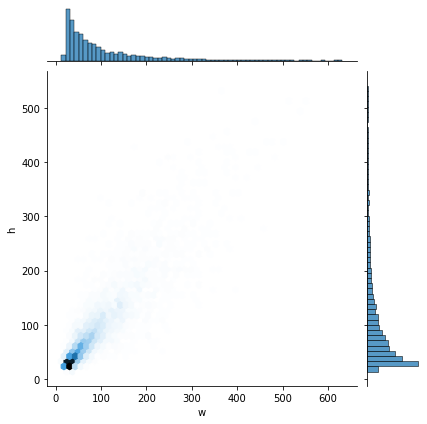

In [53]:
sns.jointplot(
    data=dist,
    x="w", y="h",
    kind="hex"
)


/home/lecun/.local/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


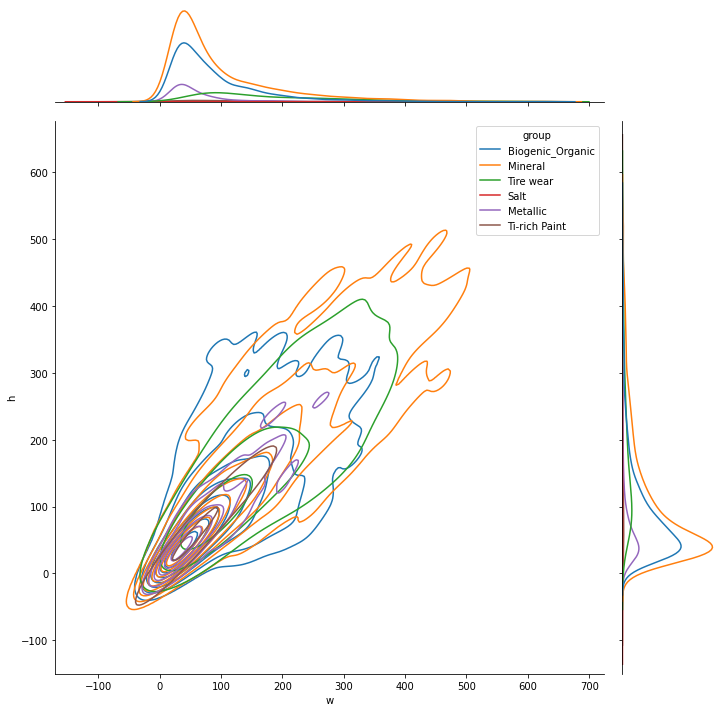

In [54]:
sns.jointplot(
    data=dist,
    x="w", y="h", hue='group',
    kind="kde", height = 10
)

## mean and std

In [2]:
import numpy as np
import cv2
import glob

# Define the path to your image dataset
image_folder = "/media/lecun/HD/Expor2/ParticlesDB/Class folders/*/*.png" # Replace with the path to your image folder and image format

# Initialize variables
image_paths = glob.glob(image_folder)
total_images = len(image_paths)
channels = 3  # Assuming RGB images, change it to 1 for grayscale


mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])

numSamples = len(image_paths)

for file in image_paths:
    im = cv2.imread(str(file))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.astype(float) / 255.
    
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])

mean = (mean/numSamples)

for file in image_paths:
    im = cv2.imread(str(file))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.astype(float) / 255.
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])

std = np.sqrt(stdTemp/numSamples)

print('Mean:', mean)
print('Std:', std)


Mean: [0.20849636 0.20849636 0.20849636]
Std: [0.15197387 0.15197387 0.15197387]


255:
Mean: [53.16657147 53.16657147 53.16657147]
Std: [52.95829317 52.95829317 52.95829317]


0-1:
Mean: [0.20849636 0.20849636 0.20849636]
Std: [0.15197387 0.15197387 0.15197387]